In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import xgboost
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, LassoCV
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [95]:
df_train = pd.read_csv('../dataset/train(preprocess_v2).csv')
df_test = pd.read_csv('../dataset/test(preprocess_v2).csv')
df_train.head()
df_test.head()
test_start_id = len(df_train)
test_start_id

,1stFlrSF,FullBath,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,...,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_none,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,6.752270,2,548.0,2.0,7.444249,7,12.247694,2.079442,6.752270,2.639057,...,0,0,0,1,0,0,0,0,1,0
1,7.140453,2,460.0,2.0,7.140453,6,12.109011,1.791759,7.140453,3.713572,...,0,0,0,1,0,0,0,0,1,0
2,6.824374,2,608.0,2.0,7.487734,7,12.317167,1.791759,6.824374,2.772589,...,0,0,0,1,0,0,0,0,1,0
3,6.867974,1,642.0,3.0,7.448334,7,11.849398,1.945910,6.628041,4.624973,...,0,0,0,1,1,0,0,0,0,0
4,7.043160,2,836.0,3.0,7.695303,8,12.429216,2.197225,7.043160,2.833213,...,0,0,0,1,0,0,0,0,1,0


,1stFlrSF,FullBath,GarageArea,GarageCars,GrLivArea,OverallQual,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,YearRemodAdd,...,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_none,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,6.797940,1,730.0,1.0,6.797940,5,1.609438,6.782192,4.025352,56,...,0,1,0,0,0,0,0,0,1,0
1,7.192182,1,312.0,1.0,7.192182,6,1.791759,7.192182,4.077537,59,...,0,0,0,1,0,0,0,0,1,0
2,6.833032,2,482.0,2.0,7.395722,5,1.791759,6.833032,2.995732,19,...,0,1,0,0,0,0,0,0,1,0
3,6.830874,2,470.0,2.0,7.380256,6,1.945910,6.830874,2.944439,19,...,0,0,0,1,0,0,0,0,1,0
4,7.154615,2,506.0,2.0,7.154615,8,1.609438,7.154615,3.218876,25,...,0,0,0,1,0,0,0,0,1,0


1460

In [96]:
num_variable = [ 'OverallQual',
                 'GrLivArea',
                 'GarageCars',
                 'GarageArea',
                 'TotalBsmtSF',
                 '1stFlrSF',
                 'FullBath',
                 'TotRmsAbvGrd',
                 'YearBuilt',
                 'YearRemodAdd']

In [97]:
df = pd.concat([df_train.drop('SalePrice', axis=1), df_test])

In [98]:
for i, k in enumerate(num_variable):
    minmax_scaler = MinMaxScaler()
    df.loc[:, k] = minmax_scaler.fit_transform(df.loc[:, k])

D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:

In [99]:
df_train.loc[:, num_variable] = df.iloc[:test_start_id][num_variable]
df_test.loc[:, num_variable] = df.iloc[test_start_id:][num_variable]

In [100]:
# # Build as ndarray
x_train = np.array(df_train.drop('SalePrice', axis=1))
y_train = np.array(df_train['SalePrice'])
x_predict = np.array(df_test.loc[:,:])

In [101]:
sale_price_min_max_scaler = MinMaxScaler()
y_train_scaler = sale_price_min_max_scaler.fit_transform(y_train)

D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [102]:
xgb_regressor = xgboost.XGBRegressor(n_estimators=360, max_depth=6, learning_rate=0.1)

In [119]:
kf = KFold(n_splits=10, shuffle=True, random_state=123456)
models = {}
for train_index, test_index in kf.split(x_train):
    x = x_train[train_index, :]
    y = y_train_scaler[train_index]
    
    xgb_regressor.fit(x, y)
    y_predict = xgb_regressor.predict(x_train[test_index,:])
    y_true = y_train_scaler[test_index]
    
    y_predict = sale_price_min_max_scaler.inverse_transform(y_predict)
    y_true = sale_price_min_max_scaler.inverse_transform(y_true)
    
    y_true = np.exp(y_true)
    y_predict = np.exp(y_predict)
    xgb_regressor.score(x, y)
#     error = np.linalg.norm(y_predict-y_true, ord=1) / len(y_predict)
    error = np.sum(abs(y_predict-y_true)) / len(y_predict)
    
    print(error)
    models[error] = xgb_regressor

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=360, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


0.99908108302333642

17491.255137


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=360, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


0.99885127265563944

21211.2240743


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=360, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


0.99908353095646629

14035.8717894


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=360, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


0.99903583647883465

17128.7274722


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=360, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


0.99911244463904769

20869.8814212


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=360, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


0.99872680274501202

18543.6400899


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=360, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


0.99894666970785639

17762.5987265


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=360, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


0.99905986272952274

17870.7178671


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=360, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


0.99882459428885828

16181.2634846


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=360, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


0.99904997940961426

16388.8918557


In [104]:
lasso_cv = Lasso(alpha=5e-4, max_iter=50000)

In [105]:
kf = KFold(n_splits=10, shuffle=True, random_state=123456)
models = {}
for train_index, test_index in kf.split(x_train):
    x = x_train[train_index, :]
    y = y_train_scaler[train_index]
    
    lasso_cv.fit(x, y)
    y_predict = lasso_cv.predict(x_train[test_index,:])
    y_true = y_train_scaler[test_index]
    
    y_predict = sale_price_min_max_scaler.inverse_transform(y_predict)
    y_true = sale_price_min_max_scaler.inverse_transform(y_true)
    
    y_true = np.exp(y_true)
    y_predict = np.exp(y_predict)

#     error = np.linalg.norm(y_predict-y_true, ord=1) / len(y_predict)
    error = np.sum(abs(y_predict-y_true)) / len(y_predict)
    
    print(error)
    models[error] = xgb_regressor

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=50000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

14395.4695772


D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=50000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

19778.7307177


D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=50000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

13824.9100887


D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=50000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

17257.5945286


D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=50000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

20952.2374833


D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=50000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

16391.5179148


D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=50000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


21470.4846757


Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=50000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


15782.314237


Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=50000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


16216.9416579


Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=50000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

15595.1830472


D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [113]:
xgb_regressor = xgboost.XGBRegressor(n_estimators=360, max_depth=6, learning_rate=0.1)
xgb_regressor.fit(x_train, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=360, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [126]:
y = models[14035.871789383515].predict(x_predict)

In [127]:
y = sale_price_min_max_scaler.inverse_transform(y)
y = np.exp(y)

D:\Programme Software\Anaconda\install\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [128]:
result = pd.DataFrame({'Id': range(len(y)), 'SalePrice': y})
result['Id'] += 1461 
result.to_csv('../submission/submission(xgb good param_1).csv', index=False)

In [92]:
y.shape

(1459,)

In [122]:
models[14035.871789383515].predict

{14035.871789383515: XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
        learning_rate=0.1, max_delta_step=0, max_depth=6,
        min_child_weight=1, missing=None, n_estimators=360, nthread=-1,
        objective='reg:linear', reg_alpha=0, reg_lambda=1,
        scale_pos_weight=1, seed=0, silent=True, subsample=1),
 16181.263484589044: XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
        learning_rate=0.1, max_delta_step=0, max_depth=6,
        min_child_weight=1, missing=None, n_estimators=360, nthread=-1,
        objective='reg:linear', reg_alpha=0, reg_lambda=1,
        scale_pos_weight=1, seed=0, silent=True, subsample=1),
 16388.891855736285: XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
        learning_rate=0.1, max_delta_step=0, max_depth=6,
        min_child_weight=1, missing=None, n_estimators=360, nthread=-1,
        objective='reg:linear', reg_alpha=0, reg_lambda=1,
       

In [129]:
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l1
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x00000202A20DD7F0>>
Traceback (most recent call last):
  File "D:\Programme Software\Anaconda\install\lib\site-packages\xgboost\core.py", line 337, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'


In [132]:
model = Sequential()
model.add(Dense(1, input_dim=(x_train.shape[1])))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_3 (Dense)                  (None, 1)             230         dense_input_3[0][0]              
Total params: 230
Trainable params: 230
Non-trainable params: 0
____________________________________________________________________________________________________


In [135]:
model.fit(x_train, y_train, batch_size=16, validation_split=0.02)

Train on 1430 samples, validate on 30 samples
Epoch 1/10
1430/1430 [==============================] - 0s - loss: 112.2909 - val_loss: 82.4248
Epoch 2/10
1430/1430 [=====================

In [141]:
y = model.predict(x_predict)

In [142]:
y = np.exp(y)
y

array([[  67328.578125 ],
       [ 322584.75     ],
       [ 309924.5      ],
       ..., 
       [ 121092.4375   ],
       [ 109408.8515625],
       [ 155304.8125   ]], dtype=float32)

In [147]:
y = y.reshape(1,-1)

In [148]:
y[0]

array([  67328.578125 ,  322584.75     ,  309924.5      , ...,
        121092.4375   ,  109408.8515625,  155304.8125   ], dtype=float32)

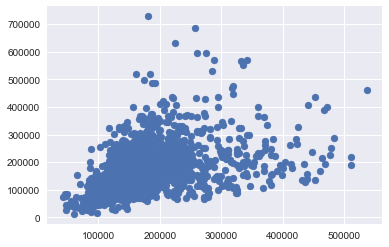

In [149]:
plt.scatter(result['SalePrice'], y)